# Порівняння продуктивності: LRU Cache vs Splay Tree для чисел Фібоначчі
У цьому ноутбуці ми порівнюємо два підходи до кешування чисел Фібоначчі:
- `@lru_cache` з модуля `functools`
- Ручна реалізація `Splay Tree` з логікою кешування


In [4]:
import timeit
import matplotlib.pyplot as plt
from functools import lru_cache
import pandas as pd

In [5]:
@lru_cache(maxsize=None)
def fibonacci_lru(n):
    if n <= 1:
        return n
    return fibonacci_lru(n - 1) + fibonacci_lru(n - 2)

In [6]:
class SplayNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class SplayTree:
    def __init__(self):
        self.root = None

    def _zig(self, x):
        p = x[1]
        if p.left == x[0]:
            p.left = x[0].right
            x[0].right = p
        else:
            p.right = x[0].left
            x[0].left = p
        return x[0]

    def _splay(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            if root.left is None:
                return root
            if key < root.left.key:
                root.left.left = self._splay(root.left.left, key)
                root = self._zig((root.left, root))
            elif key > root.left.key:
                root.left.right = self._splay(root.left.right, key)
                if root.left.right:
                    root.left = self._zig((root.left.right, root.left))
            return self._zig((root.left, root)) if root.left else root
        else:
            if root.right is None:
                return root
            if key > root.right.key:
                root.right.right = self._splay(root.right.right, key)
                root = self._zig((root.right, root))
            elif key < root.right.key:
                root.right.left = self._splay(root.right.left, key)
                if root.right.left:
                    root.right = self._zig((root.right.left, root.right))
            return self._zig((root.right, root)) if root.right else root

    def insert(self, key, value):
        if self.root is None:
            self.root = SplayNode(key, value)
            return
        self.root = self._splay(self.root, key)
        if self.root.key == key:
            return
        new_node = SplayNode(key, value)
        if key < self.root.key:
            new_node.right = self.root
            new_node.left = self.root.left
            self.root.left = None
        else:
            new_node.left = self.root
            new_node.right = self.root.right
            self.root.right = None
        self.root = new_node

    def get(self, key):
        self.root = self._splay(self.root, key)
        if self.root and self.root.key == key:
            return self.root.value
        return None

In [7]:
def fibonacci_splay(n, tree):
    cached = tree.get(n)
    if cached is not None:
        return cached
    if n <= 1:
        tree.insert(n, n)
        return n
    value = fibonacci_splay(n - 1, tree) + fibonacci_splay(n - 2, tree)
    tree.insert(n, value)
    return value

In [8]:
test_values = list(range(0, 1000, 50))
lru_times = []
splay_times = []

for n in test_values:
    lru_time = timeit.timeit(lambda: fibonacci_lru(n), number=3) / 3
    tree = SplayTree()
    splay_time = timeit.timeit(lambda: fibonacci_splay(n, tree), number=3) / 3
    lru_times.append(lru_time)
    splay_times.append(splay_time)

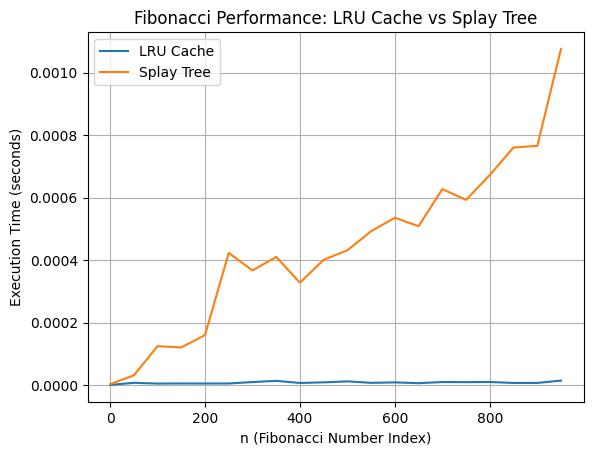

In [9]:
plt.figure()
plt.plot(test_values, lru_times, label='LRU Cache')
plt.plot(test_values, splay_times, label='Splay Tree')
plt.xlabel('n (Fibonacci Number Index)')
plt.ylabel('Execution Time (seconds)')
plt.title('Fibonacci Performance: LRU Cache vs Splay Tree')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
result_table = pd.DataFrame({
    'n': test_values,
    'LRU Cache Time (s)': lru_times,
    'Splay Tree Time (s)': splay_times
})
print(result_table.to_string(index=False))

  n  LRU Cache Time (s)  Splay Tree Time (s)
  0            0.000001             0.000004
 50            0.000008             0.000032
100            0.000005             0.000125
150            0.000006             0.000121
200            0.000006             0.000161
250            0.000006             0.000423
300            0.000010             0.000367
350            0.000014             0.000410
400            0.000007             0.000328
450            0.000009             0.000401
500            0.000012             0.000432
550            0.000008             0.000493
600            0.000009             0.000536
650            0.000007             0.000509
700            0.000010             0.000628
750            0.000010             0.000593
800            0.000011             0.000673
850            0.000007             0.000761
900            0.000007             0.000766
950            0.000015             0.001076
